<a href="https://colab.research.google.com/github/gawankarsanket/dswithchirag_assignments/blob/main/EDA_AirQualityIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india/data

In [62]:
import pandas as pd
import numpy as np

In [104]:
df=pd.read_csv("/content/AQI_city_day.csv")

In [105]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [107]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [108]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [109]:
df.shape

(29531, 16)

In [110]:
df.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [113]:
df.duplicated().sum()

#So no duplicate rows

0

In [114]:
#check for  null values
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [115]:
# if we do df.dropna(), we will loose most data so Lets update missing values
#with mean of respective column

df.fillna(df.mean(),inplace=True)
df.isnull().sum()

<ipython-input-115-83dd9d9cfba6>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(),inplace=True)


City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [116]:
df['AQI_Bucket'].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [121]:
df['AQI_Bucket'].mode()

0    Moderate
Name: AQI_Bucket, dtype: object

In [132]:
df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0],inplace=True)


# mode() returns a Series (a type of pandas DataFrame), not a single value.
#This is because there can technically be multiple modes in a dataset.
#By indexing with [0], you are selecting the first mode in the dataset

In [133]:
df['AQI_Bucket'].mode()

0    Moderate
Name: AQI_Bucket, dtype: object

In [134]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [135]:
df['AQI_Bucket'].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Severe', 'Satisfactory', 'Good'],
      dtype=object)

In [137]:
df['AQI_Bucket'].value_counts()

#Imbalance dataset

Moderate        13510
Satisfactory     8224
Poor             2781
Very Poor        2337
Good             1341
Severe           1338
Name: AQI_Bucket, dtype: int64

<Axes: >

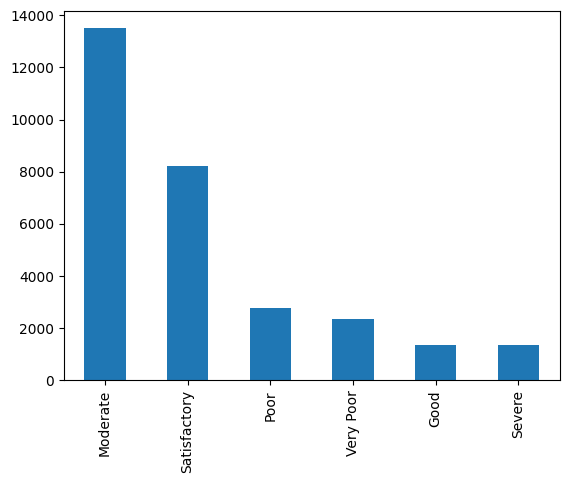

In [142]:
#Find output columns in bar graph

df['AQI_Bucket'].value_counts().plot(kind='bar')

In [138]:
df.corr()

<ipython-input-138-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.558079,0.426375,0.344341,0.380725,0.189227,0.086663,0.119512,0.155330,0.021934,0.107788,0.070459,0.628860
PM10,0.558079,1.000000,0.431006,0.359165,0.415133,0.223025,0.047517,0.176188,0.203595,0.019215,0.121983,0.031256,0.484497
NO,0.426375,0.431006,1.000000,0.462402,0.746223,0.156394,0.211639,0.166190,0.014218,0.033901,0.134201,0.059494,0.430600
NO2,0.344341,0.359165,0.462402,1.000000,0.574190,0.165984,0.353237,0.382758,0.285448,0.025082,0.254074,0.133037,0.522994
NOx,0.380725,0.415133,0.746223,0.574190,1.000000,0.128051,0.225097,0.208355,0.083063,0.037383,0.168780,0.056920,0.438363
NH3,0.189227,0.223025,0.156394,0.165984,0.128051,1.000000,0.020029,-0.021005,0.078688,-0.011864,0.007442,-0.002215,0.137436
CO,0.086663,0.047517,0.211639,0.353237,0.225097,0.020029,1.000000,0.472583,0.039787,0.061351,0.274882,0.145190,0.649679
SO2,0.119512,0.176188,0.166190,0.382758,0.208355,-0.021005,0.472583,1.000000,0.156610,0.033059,0.265522,0.203766,0.452768
O3,0.155330,0.203595,0.014218,0.285448,0.083063,0.078688,0.039787,0.156610,1.000000,0.018748,0.113683,0.068016,0.188590
Benzene,0.021934,0.019215,0.033901,0.025082,0.037383,-0.011864,0.061351,0.033059,0.018748,1.000000,0.694691,0.092957,0.041518


<ipython-input-140-a7434eca7f55>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

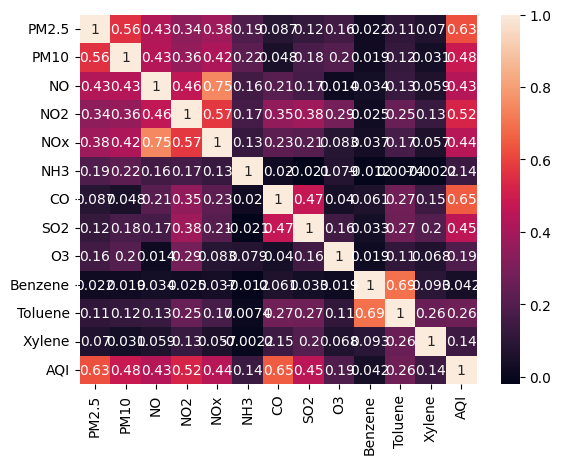

In [140]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

<Axes: ylabel='PM2.5'>

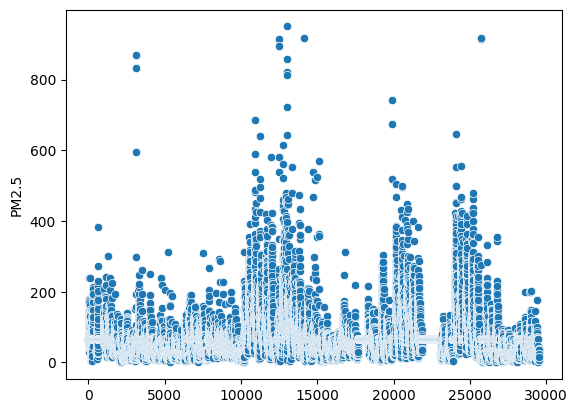

In [145]:
#PM2.5 and  CO has somwhat close co=relation with AQI
sns.scatterplot( df['PM2.5'])

<Axes: ylabel='CO'>

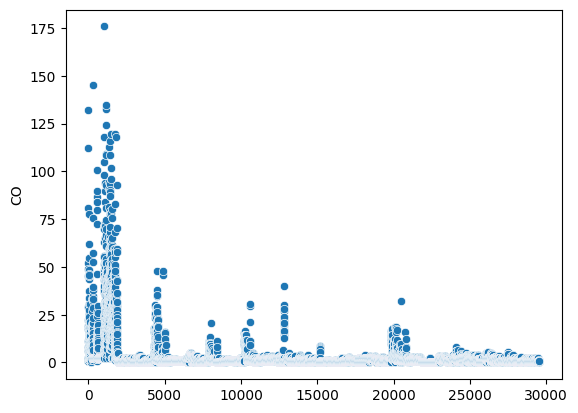

In [146]:
sns.scatterplot( df['CO'])